In [23]:
#Description: This is sentiment analysis program that parses the tweets fetched from Twitter using Python

In [24]:
# import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re #regular expressions
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #style sheet

In [25]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (1).csv


In [26]:
# Get the data
log = pd.read_csv('Login.csv')

In [27]:
# Twitter API credentials
consumerKey = '1xpGiN2TtSrPCbO1HJqUR70c2'
consumerSecret = 'YqI4YMinFN7z4Xz8UXNRla7R1WCFvsNQYS16ZP7dmbC0o6o762'
accessToken = '1029812720072253441-OYnX0Ra15Bdv1EM8IMU5ZXPFPuAlY4'
accessTokenSecret = 'kWaiYWLO0JpxDRyf0f8lP4JS1D0JrMopqR3QloEBsKPZD'

In [28]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [29]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name='realDonaldTrump', count= 100, lang = 'en', tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent tweets: 

1) RT @markknoller: Pres announces major breakthrough toward normalization of economic relations between Kosovo and Serbia. Calls it a first s…

2) Great job @PeteHegseth, one of a kind! @foxandfriends

3) Not any more! https://t.co/7Z2wxA6K13

4) RT @DrKarlynB: YESSSSSSSSSS!!!!!!!!!! Look what you did @realchrisrufo!

5) RT @DrKarlynB: Seriously this is so incredibly important. As an I/O psychologist, I’ve seen the results of these trainings. Not only are th…



In [30]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,RT @markknoller: Pres announces major breakthr...
1,"Great job @PeteHegseth, one of a kind! @foxand..."
2,Not any more! https://t.co/7Z2wxA6K13
3,RT @DrKarlynB: YESSSSSSSSSS!!!!!!!!!! Look wha...
4,RT @DrKarlynB: Seriously this is so incredibly...


In [31]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  #Removed @mentions
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #r - raw string
  #Removed #tags
  text = re.sub(r'#', '', text)
  #Removed RT (retweets)
  text = re.sub(r'RT[\s]+', '', text) #RT with one more whitespaces
  #Removed hyperlinks/URLs
  text = re.sub(r'https?:\/\/\S+', '', text) #? - may or may not have 's' (http or https)

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,: Pres announces major breakthrough toward nor...
1,"Great job , one of a kind!"
2,Not any more!
3,: YESSSSSSSSSS!!!!!!!!!! Look what you did !
4,: Seriously this is so incredibly important. A...
...,...
95,": Outside of the hangar at airport in Latrobe,..."
96,"I’m going to Latrobe, Pennsylvania, the home o..."
97,"...To the leaders of Iran, I would greatly app..."
98,Hearing that Iran is looking to execute a grea...


In [32]:
# Create a function to get the subjectivity
# Subjectivity: Tells how subjective / opinionated the text is 
# Range = [0,1]

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
# Polarity: Tells how positive / negative the text is
# Range = [-1,1]
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,: Pres announces major breakthrough toward nor...,0.344444,0.170833
1,"Great job , one of a kind!",0.825000,0.775000
2,Not any more!,0.500000,0.625000
3,: YESSSSSSSSSS!!!!!!!!!! Look what you did !,0.000000,0.000000
4,: Seriously this is so incredibly important. A...,0.888889,0.022222
...,...,...,...
95,": Outside of the hangar at airport in Latrobe,...",0.125000,0.100000
96,"I’m going to Latrobe, Pennsylvania, the home o...",0.675000,0.350000
97,"...To the leaders of Iran, I would greatly app...",0.575000,0.462500
98,Hearing that Iran is looking to execute a grea...,0.525000,0.400000


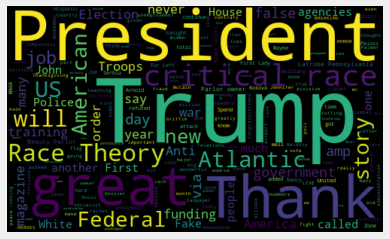

In [33]:
# Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# The bigger the word, the more frequent the word has been used

In [34]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  if score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Pres announces major breakthrough toward nor...,0.344444,0.170833,Positive
1,"Great job , one of a kind!",0.825000,0.775000,Positive
2,Not any more!,0.500000,0.625000,Positive
3,: YESSSSSSSSSS!!!!!!!!!! Look what you did !,0.000000,0.000000,Neutral
4,: Seriously this is so incredibly important. A...,0.888889,0.022222,Positive
...,...,...,...,...
95,": Outside of the hangar at airport in Latrobe,...",0.125000,0.100000,Positive
96,"I’m going to Latrobe, Pennsylvania, the home o...",0.675000,0.350000,Positive
97,"...To the leaders of Iran, I would greatly app...",0.575000,0.462500,Positive
98,Hearing that Iran is looking to execute a grea...,0.525000,0.400000,Positive


In [35]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+ ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) : Pres announces major breakthrough toward normalization of economic relations between Kosovo and Serbia. Calls it a first s…

2) Great job , one of a kind! 

3) Not any more! 

4) : Seriously this is so incredibly important. As an I/O psychologist, I’ve seen the results of these trainings. Not only are th…

5) : Trump Tells Federal Government to Stop Anti-American Training on Critical Race Theory!

You're welcome, America. https…

6) : WOW.  has ordered all federal agencies to “cease and desist” any government training programs that include an…

7) : omg, Trump is halting all government critical race theory training!

This is amazing.
 

8) : Yet another very important difference between ⁦⁩ and BeijingBiden.  Thank you mr president for understandin…

9) : NEW: Trump to go to war with "critical race theory," demands federal agencies identify and then strip funding for traini…

10) : The President and his Administration are fully committed to the fair and equal treatment of all indiv

In [36]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+ ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1) : WHITE HOUSE: "The divisive, false, and demeaning propaganda of the critical race theory movement is contrary to all we sta…

2) : Trump is banning Critical Race Theory in the federal government. No more of this garbage, especially not on taxpayer dollars.

3) : 🔥 Trump’s administration cracks down on racist teachings in various executive branch agencies: “divisive, false, and deme…

4) : Breaking: President  orders defunding of 'un-American propaganda' teaching white privilege and critical race…

5) :   Sorry liberals! How to be Anti-White 101 is permanently cancelled! 

6) You work so hard for the military, from completely rebuilding a depleted mess that was left by OBiden, to fixing a broken V.A. and fighting for large scale military pay raises, and then a slimeball reporter, maybe working with disgruntled people, makes up such a horrible charge..

7) : Fox News' John Roberts says two people he spoke with refuted the false Atlantic magazine story.  h…

8) : The United States of 

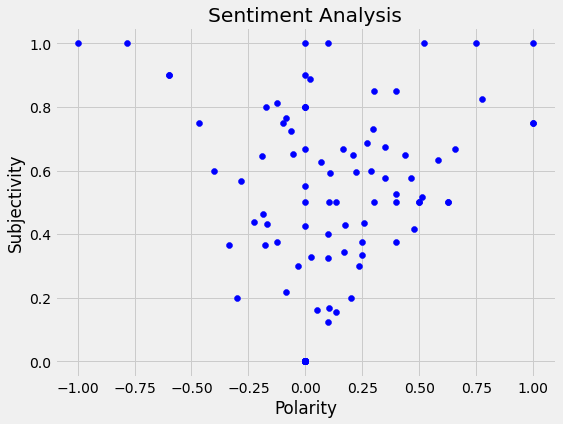

In [37]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
  
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [38]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

50.0

In [39]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0])*100, 1)

23.0

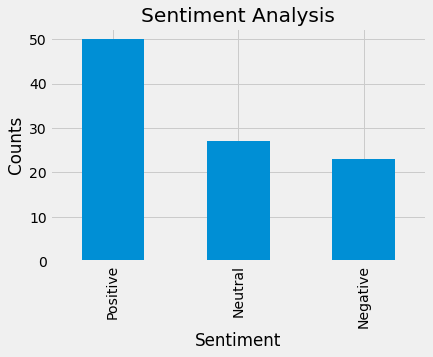

In [40]:
# Show the value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()